In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
%cd '/content/drive/Shareddrives/AI_tlPicker/models'
!pwd
!ls

/content/drive/Shareddrives/AI_tlPicker/models
/content/drive/Shareddrives/AI_tlPicker/models
a.npy	    BRA16E.csv	BRA20H.csv  BRA23N.csv	BRA26Z.csv	BRAPicks22.csv
BRA13E.csv  BRA16H.csv	BRA20N.csv  BRA23Z.csv	BRA27E.csv	BRAPicks23.csv
BRA13H.csv  BRA16N.csv	BRA20Z.csv  BRA24E.csv	BRA27H.csv	BRAPicks24.csv
BRA13N.csv  BRA16Z.csv	BRA21E.csv  BRA24H.csv	BRA27N.csv	BRAPicks25.csv
BRA13Z.csv  BRA18E.csv	BRA21H.csv  BRA24N.csv	BRA27Z.csv	BRAPicks26.csv
BRA14E.csv  BRA18H.csv	BRA21N.csv  BRA24Z.csv	BRAPicks13.csv	BRAPicks27.csv
BRA14H.csv  BRA18N.csv	BRA21Z.csv  BRA25E.csv	BRAPicks14.csv	event.csv
BRA14N.csv  BRA18Z.csv	BRA22E.csv  BRA25H.csv	BRAPicks15.csv	Input_ML.csv
BRA14Z.csv  BRA19E.csv	BRA22H.csv  BRA25N.csv	BRAPicks16.csv	New_model30.h5
BRA15E.csv  BRA19H.csv	BRA22N.csv  BRA25Z.csv	BRAPicks18.csv	Output.npy
BRA15H.csv  BRA19N.csv	BRA22Z.csv  BRA26E.csv	BRAPicks19.csv
BRA15N.csv  BRA19Z.csv	BRA23E.csv  BRA26H.csv	BRAPicks20.csv
BRA15Z.csv  BRA20E.csv	BRA23H.csv  BRA26N.csv	BRAPicks21.

In [4]:
s=23924

In [5]:
import numpy as np

load a and output

In [6]:
Output = np.load("Output.npy")
a = np.load("a.npy")

In [7]:
b=np.zeros((s,4,2800))
for i in list(range(0, len(a))):
  b[i][0] = a[i][0][200:3000]
  b[i][1] = a[i][1][200:3000]
  b[i][2] = a[i][2][200:3000]
  b[i][3] = a[i][3][200:3000]

del a
a=b
del b

In [8]:

X_test =a[0:1000]
Y_test = Output[0:1000]
a= a.reshape(s,4,2800,1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(a[1000:], Output[1000:], test_size=.3,shuffle=False)#shuffle=False

del a, Output

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Lambda
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout
#create model
model = Sequential()
model.add(Conv2D(12, (2, 2), activation='relu', input_shape=(4,2800,1), padding='SAME'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(24, (3, 3), activation='relu', padding='SAME'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(48, (3, 3), activation='relu', padding='SAME'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='SAME'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(units = 10, activation = 'sigmoid'))
model.add(Dense(units = 1, activation = 'relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 4, 2800, 12)       60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 1400, 12)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 1400, 24)       2616      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 700, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 700, 48)        10416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 350, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 350, 64)        2

In [11]:
model.compile(optimizer = 'adam', loss = 'mse')

In [17]:
history = model.fit(X_train,Y_train,epochs=100,batch_size=100,validation_data=(X_val,Y_val))

Epoch 1/100
161/161 [==============================] - 4s 25ms/step - loss: 0.0536 - val_loss: 0.1684
Epoch 2/100
161/161 [==============================] - 4s 23ms/step - loss: 0.0679 - val_loss: 0.2311
Epoch 3/100
161/161 [==============================] - 4s 23ms/step - loss: 0.0401 - val_loss: 0.1940
Epoch 4/100
161/161 [==============================] - 4s 23ms/step - loss: 0.0408 - val_loss: 0.1873
Epoch 5/100
161/161 [==============================] - 4s 24ms/step - loss: 0.0391 - val_loss: 0.2143
Epoch 6/100
161/161 [==============================] - 4s 23ms/step - loss: 0.0330 - val_loss: 0.2005
Epoch 7/100
161/161 [==============================] - 4s 24ms/step - loss: 0.0328 - val_loss: 0.2090
Epoch 8/100
161/161 [==============================] - 4s 23ms/step - loss: 0.0334 - val_loss: 0.2380
Epoch 9/100
161/161 [==============================] - 4s 24ms/step - loss: 0.0297 - val_loss: 0.2167
Epoch 10/100
161/161 [==============================] - 4s 24ms/step - loss: 0.027

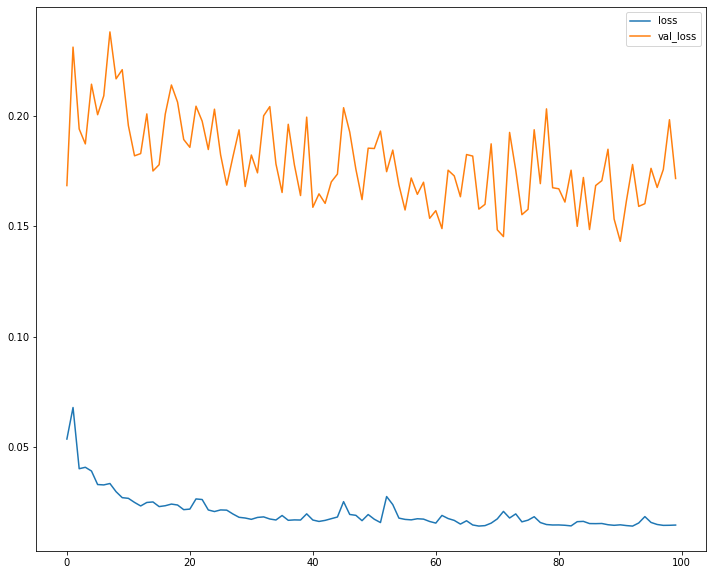

In [18]:
import pandas as pd
plt=pd.DataFrame(history.history).plot(figsize=(12,10))

In [19]:
X_test= X_test.reshape(1000,4,2800,1)
Y_pred=model.predict(X_train)
Y_pred=pd.DataFrame(Y_pred)
Y_pred.columns=['Y_Pred']
Y_pred

,Y_Pred
0,2.616752
1,2.653909
2,2.651821
3,2.699458
4,2.723271
...,...
16041,1.968306
16042,1.890526
16043,1.931133
16044,1.855619


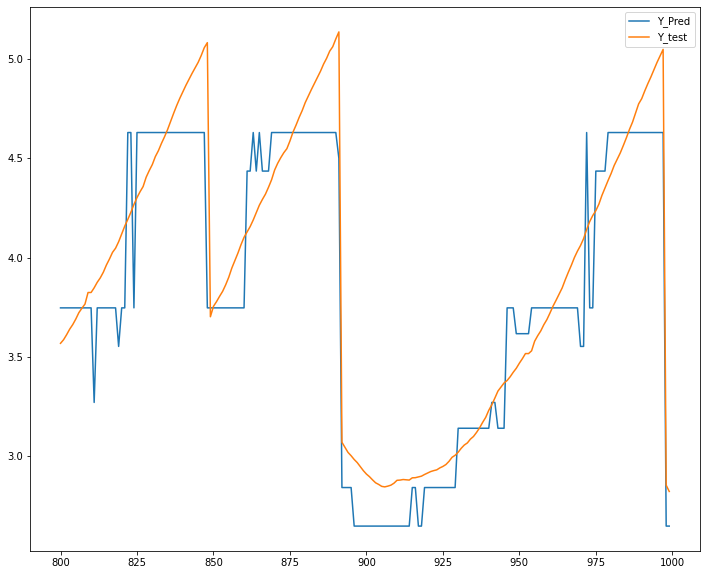

In [20]:
import matplotlib.pyplot as plt
Y_train = pd.DataFrame(Y_train)
Y_train.columns=['Y_test']
ax= Y_pred[800:1000].plot(legend=True)
Y_train[800:1000].plot(ax=ax,figsize=(12,10))



In [16]:
model.save('New_model30.h5') 